In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [24]:
dataframe = pd.read_csv('hjm_data.csv').set_index('time')/100
pd.options.display.max_rows = 10
display(dataframe)

,1/12,1/2,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
time,,,,,,,,,,,,,,,,,,,,,
1,0.057734,0.064382,0.067142,0.066512,0.064991,0.063255,0.061534,0.059925,0.058444,0.057058,...,0.034194,0.034772,0.035371,0.035985,0.036612,0.037252,0.037902,0.038562,0.039231,0.039908
2,0.057680,0.064506,0.067502,0.066842,0.065423,0.063852,0.062301,0.060846,0.059490,0.058198,...,0.033790,0.034437,0.035108,0.035798,0.036504,0.037224,0.037959,0.038705,0.039461,0.040227
3,0.057758,0.064410,0.067354,0.066845,0.065577,0.064109,0.062611,0.061164,0.059782,0.058438,...,0.032706,0.033294,0.033907,0.034539,0.035188,0.035853,0.036533,0.037224,0.037927,0.038639
4,0.057430,0.064103,0.066942,0.066215,0.064904,0.063462,0.062006,0.060601,0.059252,0.057933,...,0.031325,0.031891,0.032486,0.033106,0.033748,0.034409,0.035088,0.035784,0.036493,0.037214
5,0.057412,0.063978,0.066358,0.065502,0.064168,0.062722,0.061262,0.059849,0.058488,0.057157,...,0.030119,0.030667,0.031250,0.031862,0.032499,0.033161,0.033844,0.034546,0.035264,0.035997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,0.046421,0.045093,0.042471,0.042081,0.042663,0.043224,0.043640,0.043940,0.044156,0.044314,...,0.040260,0.040098,0.039950,0.039813,0.039687,0.039571,0.039464,0.039365,0.039273,0.039187
1261,0.046233,0.044976,0.042452,0.042131,0.042726,0.043285,0.043699,0.043998,0.044214,0.044374,...,0.040307,0.040147,0.039999,0.039863,0.039737,0.039621,0.039514,0.039414,0.039320,0.039233
1262,0.046348,0.045311,0.043295,0.043266,0.043963,0.044565,0.045003,0.045323,0.045560,0.045739,...,0.041276,0.041118,0.040972,0.040840,0.040718,0.040607,0.040505,0.040411,0.040324,0.040244


In [25]:
hist_timeline = list(dataframe.index)
tenors = [eval(x) for x in dataframe.columns]
hist_rates = np.matrix(dataframe)
hrates = np.array(hist_rates)
time = np.linspace(1,len(hist_rates),len(hist_rates))

In [26]:
def hist_rates_func(t):
    x = tenors
    y = hrates[int(t),:].transpose()
    return x, y

<IPython.core.display.Javascript object>


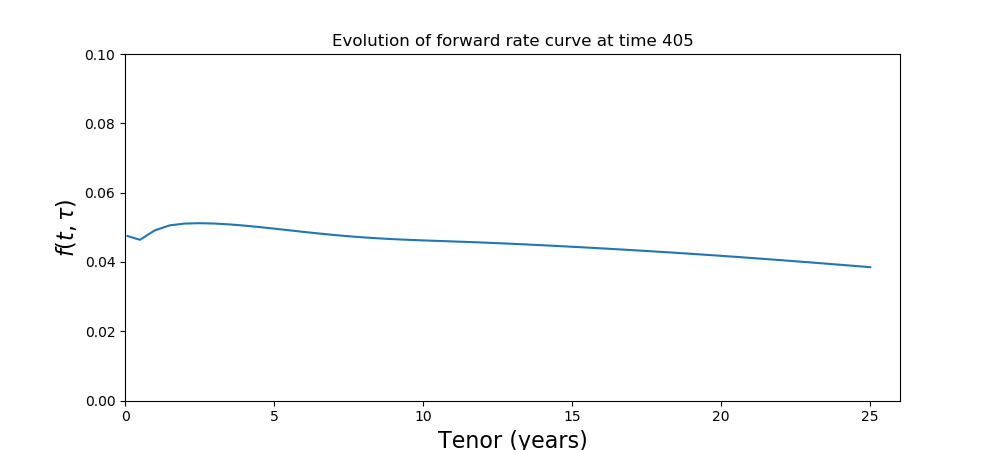

In [41]:
fig = plt.figure(figsize=(10,4.5))

ax = plt.axes(xlim =(0, 26),
                ylim =(0, 0.1))

line, = ax.plot([],[], linewidth=1.5)

def init():
    line.set_data([],[])
    return line,

def update(t):
    x, y= hist_rates_func(t)
    ax.set_title('Evolution of forward rate curve at time '+str(t))
    line.set_data(x,y)
    Time_val.set_text('time'+str(int(t)))
    ax.plot()
    return line,

Time_val = ax.text(1, 1, '', ha='right', va='top', fontsize=12)
Time_val.set_color('black')
ax.set_xlabel('Tenor (years)', size = 16)
ax.set_ylabel(r'$f(t,\tau)$', size=16)

#fig.tight_layout()

animation = FuncAnimation(fig, update, init_func = init, frames=range(len(time)), interval=50, repeat=True)